<a href="https://colab.research.google.com/github/yuzzaf/Course-Machine-Learning/blob/main/Week%208/SVM_Social_Network_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nama: Muhammad Yuzzaf Ibrahim Azzumarafi
##NIM: 1103200082
##SVM_Social Network Ads

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Define the path to the CSV file in your Google Drive
file_path = '/content/drive/MyDrive/Dataset/Social_Network_Ads.csv'

In [3]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
# Menghitung jumlah nilai yang hilang per kolom
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [24]:
# Encoding kolom "Gender" dengan one-hot encoding
#df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Memisahkan fitur (X) dan target (y)
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Melatih model pada data latih yang sudah distandarisasi
svm_model.fit(X_train_scaled, y_train)

# Menguji model pada data uji yang sudah distandarisasi
y_pred = svm_model.predict(X_test_scaled)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8625
Confusion Matrix:
[[50  2]
 [ 9 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [25]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.37080992435478316


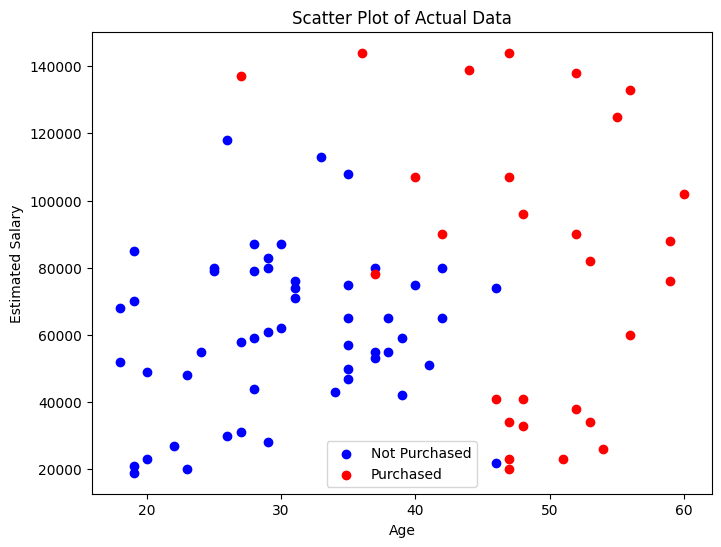

In [26]:
import matplotlib.pyplot as plt

# Membuat scatter plot untuk data aktual
plt.figure(figsize=(8, 6))

# Membuat scatter plot untuk kelas Purchased = 0 (Tidak dibeli)
plt.scatter(X_test[y_test == 0]['Age'], X_test[y_test == 0]['EstimatedSalary'], color='blue', label='Not Purchased')

# Membuat scatter plot untuk kelas Purchased = 1 (Dibeli)
plt.scatter(X_test[y_test == 1]['Age'], X_test[y_test == 1]['EstimatedSalary'], color='red', label='Purchased')

# Menambahkan label dan judul
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Scatter Plot of Actual Data')
plt.legend()
plt.show()

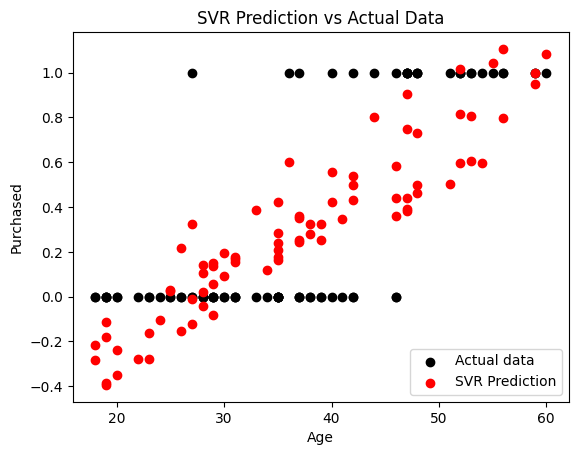

In [28]:
# Membaca dataframe dari data yang sudah ada
# Misalnya, df adalah dataframe yang sudah berisi kolom "Age", "EstimatedSalary", dan "Purchased"

# Memisahkan fitur (X) dan target (y)
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']  # Untuk regresi, ganti dengan kolom target yang sesuai

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model SVR
svr_model = SVR(kernel='linear', C=1.0)

# Melatih model pada data latih yang sudah distandarisasi
svr_model.fit(X_train_scaled, y_train)

# Menguji model pada data uji yang sudah distandarisasi
y_pred = svr_model.predict(X_test_scaled)

# Visualisasi hasil prediksi
plt.scatter(X_test['Age'], y_test, color='black', label='Actual data')
plt.scatter(X_test['Age'], y_pred, color='red', label='SVR Prediction')
plt.xlabel('Age')
plt.ylabel('Purchased')  # Ganti dengan label yang sesuai untuk regresi
plt.title('SVR Prediction vs Actual Data')
plt.legend()
plt.show()

In [29]:
# Tentukan hyperparameter yang akan diuji
param_grid = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(svr_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Gunakan model terbaik untuk membuat prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 0.202155719122676
